In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
g0 = 9.80665

In [33]:
import numpy as np


ic1 = {
    'm0' : 1000,
    'mf' : 100,
    'isp' : 300,
    'thr' : 20000,
    'h0' : 50000,
    'v0' : 10,
    'hdot0' : 10,
    'theta0' : 45
         
    
}


class Rocket:
    def __init__(self, ics):
        self.mass = ics['m0']  # kg
        self.mf = ics['mf'] 
        self.isp = ics['isp']   # s
        self.vex = self.isp * g0
        self.thrust = ics['thr']  # N
        self.mdot = self.thrust / (self.vex)
        self.altitude = ics['h0']   # m
       
        self.vy = ics['hdot0']   # m/s

        vx0 = np.sqrt(ics['v0']**2 -  ics['hdot0'] **2)  # m/s

        self.vx = vx0
        self.pitch_angle_deg = ics['theta0']   # degrees

        self.time = [0]  # storing time
        self.masses = [ics['m0']]
        self.x_positions = [0]  # storing x positions over time
        self.y_positions = [ics['h0']]  # storing y positions over time
        self.x_velocities = [vx0]  # storing x velocities over time
        self.y_velocities = [ics['hdot0']]  # storing y velocities over time
        self.pitch_angles_deg = [ics['theta0']]  # storing pitch angles over time

    def guidance(self):
        # Placeholder guidance function (here, pitch angle remains constant)
        pass

    def simulate(self, time_step, total_time, cut_alt):
        current_time = 0
        sim_end = False
        while (not sim_end):

            # Update time
            current_time += time_step
            self.time.append(current_time)

            m1 = self.mass - self.mdot * time_step

            if (m1 <= self.mf):
                m1 = self.mf
                self.mdot = 0

            self.mass = m1
        
            self.masses.append(self.mass)
            
            # Update pitch angle from degrees to radians
            pitch_angle_rad = np.deg2rad(self.pitch_angle_deg)

            # Calculate distance from the center of the Earth
            r = 6371000 + self.altitude  # Radius of the Earth + altitude

            # Calculate acceleration due to gravity
            mu = 3.986e14  # Gravitational parameter of Earth (m^3/s^2)
            gravity = mu / r**2  # m/s^2

            # Thrust components
            thr = self.thrust

            if (self.mdot == 0):
                thr = 0
            
            thrust_x = thr * np.cos(pitch_angle_rad)
            thrust_y = thr * np.sin(pitch_angle_rad)

            # Acceleration components
            ax = thrust_x / self.mass
            ay = thrust_y / self.mass - gravity  # gravity varies with altitude

            # Update velocities
            self.vx += ax * time_step
            self.vy += ay * time_step

            # Update positions
            self.x_positions.append(self.x_positions[-1] + self.vx * time_step)
            self.y_positions.append(self.y_positions[-1] + self.vy * time_step)

            # Update velocities
            self.x_velocities.append(self.vx)
            self.y_velocities.append(self.vy)


            # Update pitch angle (not implemented in this example)

            # Append pitch angle in degrees
            self.pitch_angles_deg.append(self.pitch_angle_deg)

            #end conditions
            sim_end = (current_time >= total_time) or (self.y_positions[-1] <= cut_alt and self.vy < 0)

    def plot_results(self):
        fig, axs = plt.subplots(4, figsize=(10, 16))

        # Plot trajectory
        axs[0].plot(self.x_positions, self.y_positions)
        axs[0].set_xlabel('X Position (m)')
        axs[0].set_ylabel('Y Position (m)')
        axs[0].set_title('Rocket Trajectory')

        # Plot pitch angle
        axs[1].plot(self.time, self.masses)
        axs[1].set_xlabel('Time')
        axs[1].set_ylabel('mass')

        # Plot velocities
        axs[2].plot(self.time, self.x_velocities, label='X Velocity')
        axs[2].plot(self.time, self.y_velocities, label='Y Velocity')
        axs[2].set_xlabel('Time')
        axs[2].set_ylabel('Velocity (m/s)')
        axs[2].set_title('Rocket Velocities')
        axs[2].legend()

        # Plot pitch angle
        axs[3].plot(self.time, self.pitch_angles_deg)
        axs[3].set_xlabel('Time')
        axs[3].set_ylabel('Pitch Angle (degrees)')
        axs[3].set_title('Pitch Angle over Time')

        plt.tight_layout()
        plt.show()


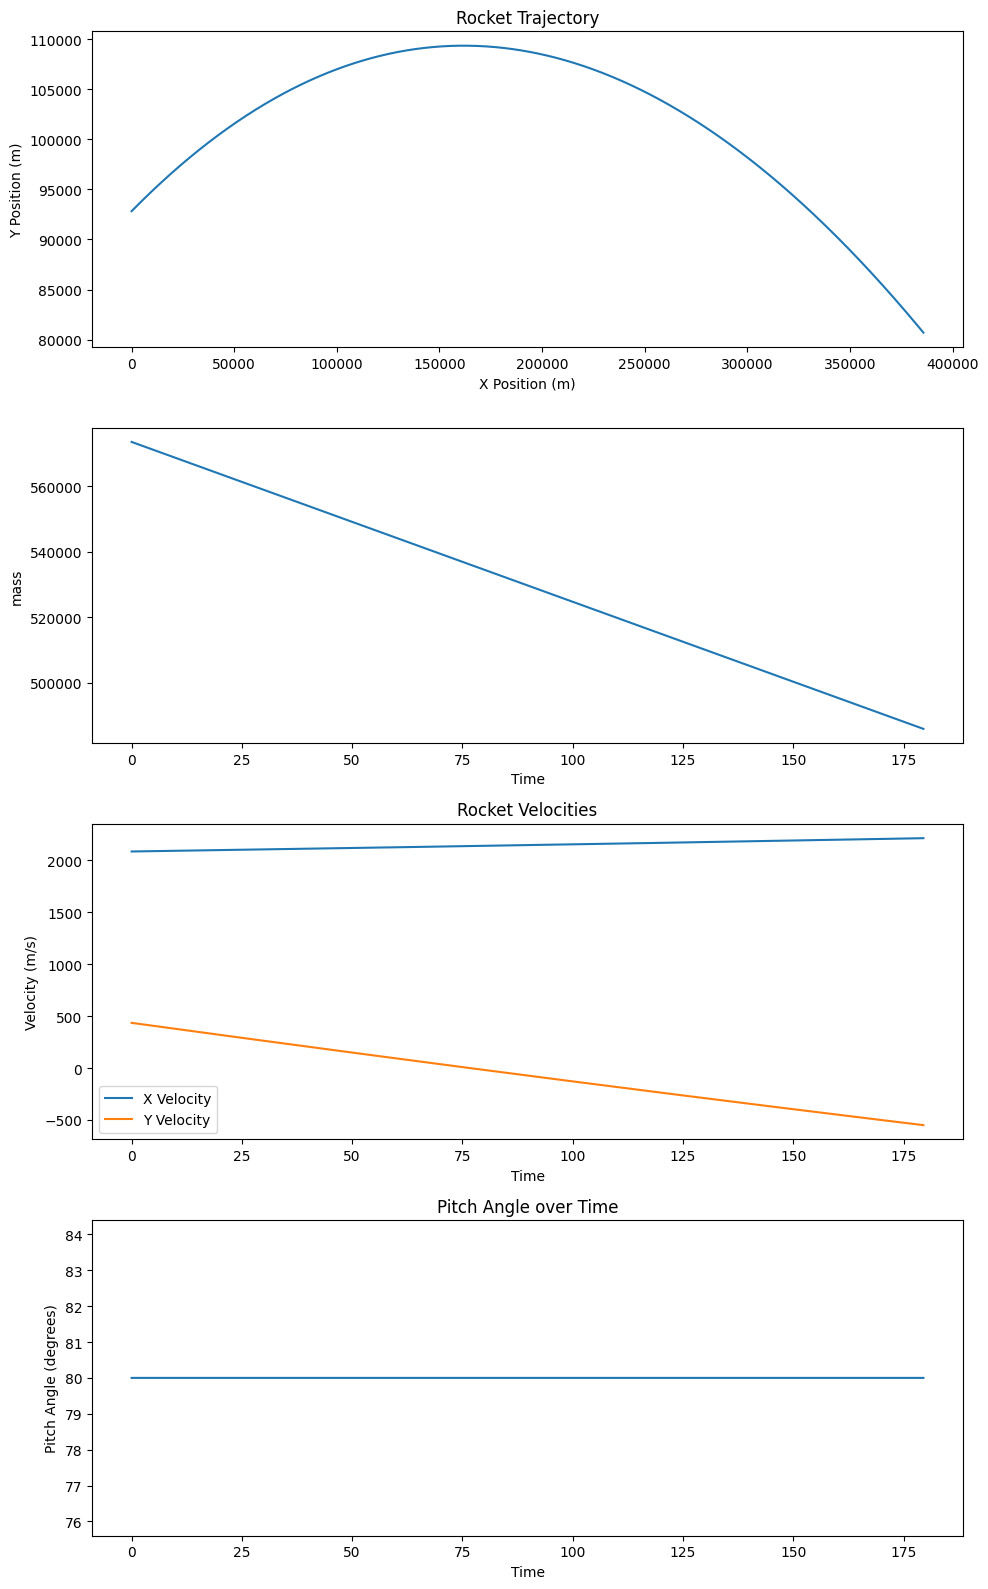

In [34]:
#2eo at t+148
ic1 = {
    'm0' : 649993,
    'mf' : 121857.8,
    'isp' : 453.5,
    'thr' : 2173600,
    'h0' : 61000,
    'v0' : 1732.6,
    'hdot0' : 621.4,
    'theta0' : 25
}

#2eo at t+200
ic2 = {
    'm0' : 573558,
    'mf' : 121857.8,
    'isp' : 453.5,
    'thr' : 2173600,
    'h0' : 92830,
    'v0' : 2131.7,
    'hdot0' : 435.4,
    'theta0' : 80
}

#2eo at t+243
ic3 = {
    'm0' : 509941,
    'mf' : 121857.8,
    'isp' : 453.5,
    'thr' : 2173600,
    'h0' : 108430,
    'v0' : 2564.5,
    'hdot0' : 289.5,
    'theta0' : 80
}

ics = ic2

# Create rocket object
rocket = Rocket(ics)

# Simulation parameters
time_step = 0.1  # s
total_time = 1000  # s
cut_alt = 80700

# Simulate rocket flight
rocket.simulate(time_step, total_time, cut_alt)

# Plot trajectory
rocket.plot_results()


